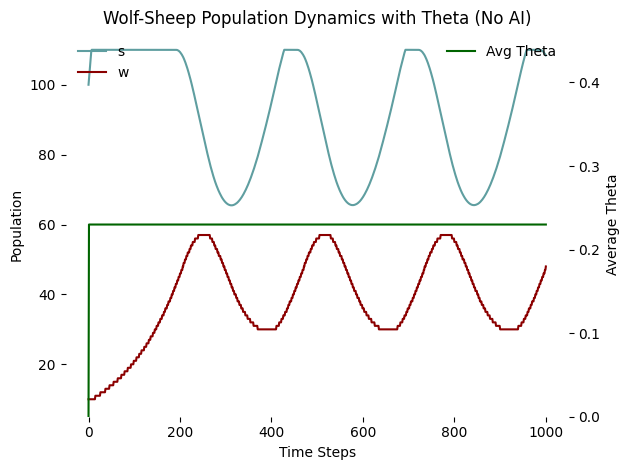

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath(".."))

# Fix the import path
from model.model import run_coroutine

# Run model with no_ai=True (note the correct keyword argument syntax)
results = await run_coroutine(
    steps=1000,
    no_ai=True,
    theta_star=0.23
    )

# Convert results to a DataFrame for plotting
xdf = pd.DataFrame(
    {
        "t": list(range(len(results["sheep_history"]))),  # Use dictionary access with ["key"]
        "s": results["sheep_history"],                    # instead of .attribute
        "w": results["wolf_history"],
        "avg theta": results["average_theta_history"],
    }
)

# Plot populations on left y-axis
ax1 = plt.gca()
sns.lineplot(
    data=pd.melt(xdf, id_vars=["t"], value_vars=["s", "w"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1,
)

# Plot average theta on right y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=xdf,
    x="t",
    y="avg theta",
    color="darkgreen",
    ax=ax2,
)

# Set the y-axis limits for the right axis to make theta more visible
# Scale to approximately 2x the max theta value
max_theta = max(results["average_theta_history"])
ax2.set_ylim(0, max_theta * 2)

ax2.set_ylabel("Average Theta")

# Customize the plot
ax1.set_xlabel("Time Steps")
ax1.set_ylabel("Population")
ax1.legend(title="", loc="upper left", frameon=False)
ax2.legend(["Avg Theta"], loc="upper right", frameon=False)

sns.despine(left=True, bottom=True)
plt.title("Wolf-Sheep Population Dynamics with Theta (No AI)")
plt.tight_layout()